In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | road town
Processing Record 5 of Set 1 | wawa
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | calama
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | morondava
Processing Record 11 of Set 1 | brandon
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | karaul
City not found. Skipping...
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | yining
Processing Record 18 of Set 1 | port hardy
Processing Record 19 of Set 1 | yar-sale
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Pr

Processing Record 37 of Set 4 | cidreira
Processing Record 38 of Set 4 | hambantota
Processing Record 39 of Set 4 | kenora
Processing Record 40 of Set 4 | naryan-mar
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | ust-uda
Processing Record 43 of Set 4 | colares
Processing Record 44 of Set 4 | atbasar
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | hovd
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | amga
Processing Record 49 of Set 4 | barquisimeto
Processing Record 50 of Set 4 | umm kaddadah
Processing Record 1 of Set 5 | eyl
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | sorland
Processing Record 4 of Set 5 | rodrigues alves
Processing Record 5 of Set 5 | makarov
Processing Record 6 of Set 5 | saint-francois
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | bo
City not found. Skipping...
Processing Record 9 of Set 5 | pathein
Processing Record 10 of Set 5 | hunza
City not

Processing Record 28 of Set 8 | hokitika
Processing Record 29 of Set 8 | krasnoarmeysk
Processing Record 30 of Set 8 | tayu
Processing Record 31 of Set 8 | ambilobe
Processing Record 32 of Set 8 | mumford
Processing Record 33 of Set 8 | sinnamary
Processing Record 34 of Set 8 | slupsk
Processing Record 35 of Set 8 | chagda
City not found. Skipping...
Processing Record 36 of Set 8 | vyartsilya
Processing Record 37 of Set 8 | cap malheureux
Processing Record 38 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 39 of Set 8 | shujalpur
Processing Record 40 of Set 8 | nouakchott
Processing Record 41 of Set 8 | norman wells
Processing Record 42 of Set 8 | cockburn town
Processing Record 43 of Set 8 | codrington
Processing Record 44 of Set 8 | mandan
Processing Record 45 of Set 8 | strezhevoy
Processing Record 46 of Set 8 | alamogordo
Processing Record 47 of Set 8 | barra patuca
Processing Record 48 of Set 8 | fort collins
Processing Record 49 of Set 8 | altay
Processing Reco

Processing Record 11 of Set 12 | athens
Processing Record 12 of Set 12 | kargil
Processing Record 13 of Set 12 | tura
Processing Record 14 of Set 12 | mahibadhoo
Processing Record 15 of Set 12 | quelimane
Processing Record 16 of Set 12 | berlevag
Processing Record 17 of Set 12 | abu zabad
Processing Record 18 of Set 12 | bhuj
Processing Record 19 of Set 12 | wanning
Processing Record 20 of Set 12 | babstovo
Processing Record 21 of Set 12 | steinbach
Processing Record 22 of Set 12 | snezhnogorsk
Processing Record 23 of Set 12 | saint-louis
Processing Record 24 of Set 12 | fort nelson
Processing Record 25 of Set 12 | ruidoso
Processing Record 26 of Set 12 | mergui
City not found. Skipping...
Processing Record 27 of Set 12 | opuwo
Processing Record 28 of Set 12 | ocos
Processing Record 29 of Set 12 | kieta
Processing Record 30 of Set 12 | wroclaw
Processing Record 31 of Set 12 | richards bay
Processing Record 32 of Set 12 | nizhniy ingash
Processing Record 33 of Set 12 | mentok
City not f

In [10]:
len(city_data)

547

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.05,-27.98,66.56,69,65,8.57,PT,2020-09-30 00:00:52
1,Qaanaaq,77.48,-69.36,14.61,79,3,5.59,GL,2020-09-30 00:00:52
2,Saint George,37.10,-113.58,87.80,7,1,3.36,US,2020-09-29 23:57:44
3,Road Town,18.42,-64.62,80.01,94,15,1.99,VG,2020-09-30 00:00:52
4,Wawa,9.90,4.42,73.42,96,92,2.71,NG,2020-09-30 00:00:53
5,Bethel,41.37,-73.41,70.00,88,90,6.93,US,2020-09-30 00:00:53
6,Calama,-22.47,-68.93,68.00,14,2,20.80,CL,2020-09-30 00:00:01
7,Punta Arenas,-53.15,-70.92,33.80,83,75,23.04,CL,2020-09-29 23:57:09
8,Cape Town,-33.93,18.42,55.00,76,3,10.29,ZA,2020-09-30 00:00:14
9,Morondava,-20.28,44.28,75.22,65,0,7.34,MG,2020-09-30 00:00:54


In [12]:
#Reordering the columns
new_column_order =["City", "Country", "Date","Lat","Lng","Max Temp","Humidity", "Cloudiness","Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2020-09-30 00:00:52,39.05,-27.98,66.56,69,65,8.57
1,Qaanaaq,GL,2020-09-30 00:00:52,77.48,-69.36,14.61,79,3,5.59
2,Saint George,US,2020-09-29 23:57:44,37.10,-113.58,87.80,7,1,3.36
3,Road Town,VG,2020-09-30 00:00:52,18.42,-64.62,80.01,94,15,1.99
4,Wawa,NG,2020-09-30 00:00:53,9.90,4.42,73.42,96,92,2.71
...,...,...,...,...,...,...,...,...,...
542,Skibbereen,IE,2020-09-30 00:03:15,51.55,-9.27,55.40,93,75,23.04
543,Port Macquarie,AU,2020-09-30 00:03:16,-31.43,152.92,68.00,57,100,1.01
544,Damaturu,NG,2020-09-30 00:03:16,11.75,11.96,74.08,84,97,8.66
545,Lagunas,PE,2020-09-30 00:03:16,-5.23,-75.68,73.96,93,95,3.04


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

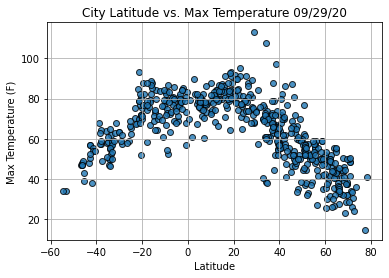

In [23]:
# Extract relevant fields from the DataFrame for plotting.
import time
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")



# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

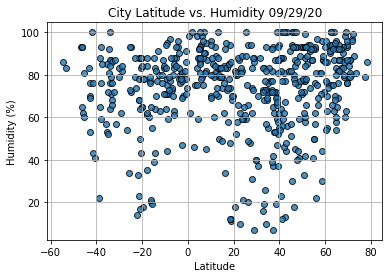

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

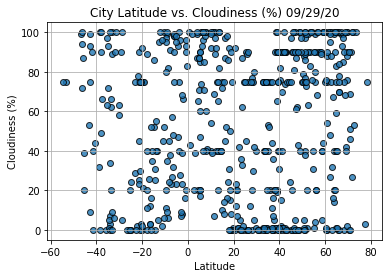

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

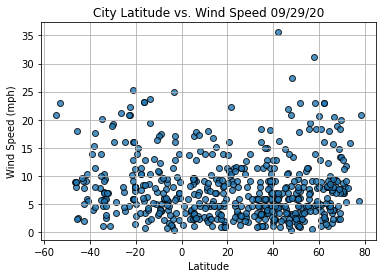

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.


In [37]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13] 
index13

City               Saint-Philippe
Country                        RE
Date          2020-09-30 00:00:55
Lat                        -21.36
Lng                         55.77
Max Temp                     69.8
Humidity                       68
Cloudiness                     45
Wind Speed                   5.82
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2020-09-30 00:00:52,39.05,-27.98,66.56,69,65,8.57
1,Qaanaaq,GL,2020-09-30 00:00:52,77.48,-69.36,14.61,79,3,5.59
2,Saint George,US,2020-09-29 23:57:44,37.10,-113.58,87.80,7,1,3.36
3,Road Town,VG,2020-09-30 00:00:52,18.42,-64.62,80.01,94,15,1.99
4,Wawa,NG,2020-09-30 00:00:53,9.90,4.42,73.42,96,92,2.71
...,...,...,...,...,...,...,...,...,...
539,Chojnow,PL,2020-09-29 23:58:48,51.27,15.94,55.99,93,100,1.01
541,Palmer,US,2020-09-30 00:03:15,42.16,-72.33,71.01,100,90,5.82
542,Skibbereen,IE,2020-09-30 00:03:15,51.55,-9.27,55.40,93,75,23.04
544,Damaturu,NG,2020-09-30 00:03:16,11.75,11.96,74.08,84,97,8.66


In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2020-09-30 00:00:52,39.05,-27.98,66.56,69,65,8.57
1,Qaanaaq,GL,2020-09-30 00:00:52,77.48,-69.36,14.61,79,3,5.59
2,Saint George,US,2020-09-29 23:57:44,37.10,-113.58,87.80,7,1,3.36
3,Road Town,VG,2020-09-30 00:00:52,18.42,-64.62,80.01,94,15,1.99
4,Wawa,NG,2020-09-30 00:00:53,9.90,4.42,73.42,96,92,2.71


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [41]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

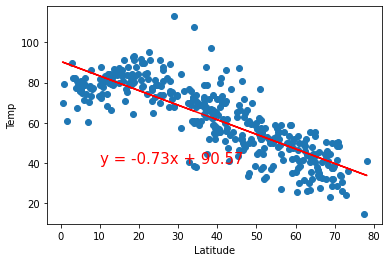

In [42]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

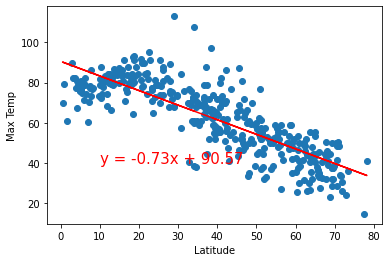

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

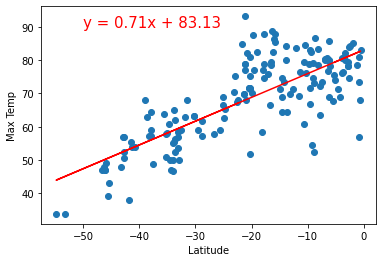

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

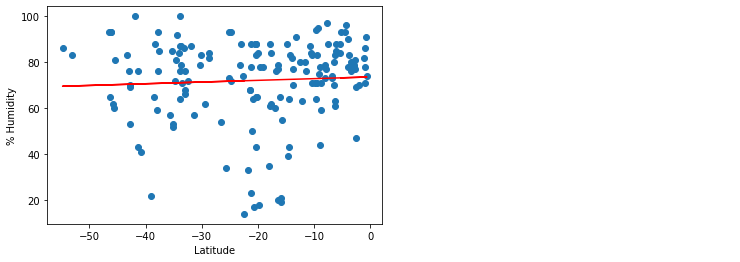

In [52]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

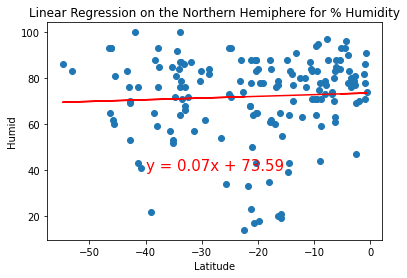

In [57]:
# Perform linear regression on the northern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-40,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humid')
plt.title('Linear Regression on the Northern Hemiphere for % Humidity')
          
plt.show()

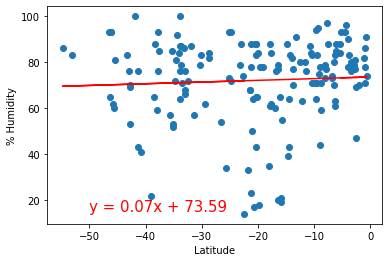

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

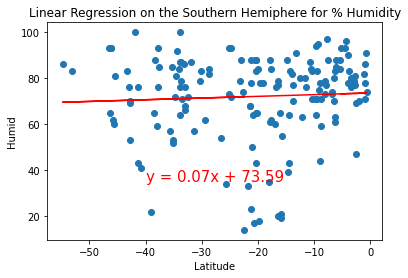

In [62]:
# Perform linear regression on the Southern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-40,35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humid')
plt.title('Linear Regression on the Southern Hemiphere for % Humidity')
          
plt.show()

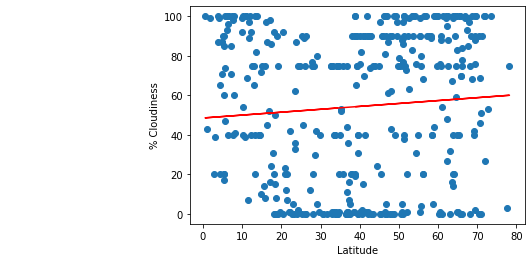

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

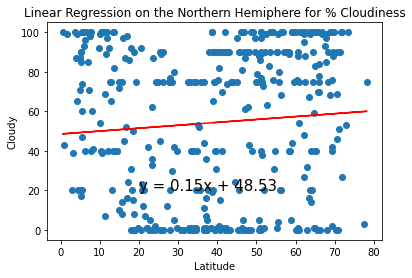

In [71]:
# Perform linear regression on the Northern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (20,20), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudy')
plt.title('Linear Regression on the Northern Hemiphere for % Cloudiness')
          
plt.show()


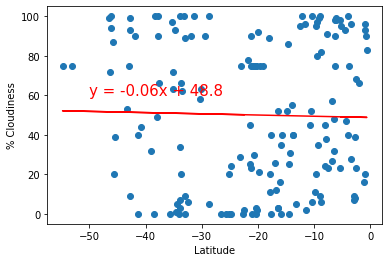

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

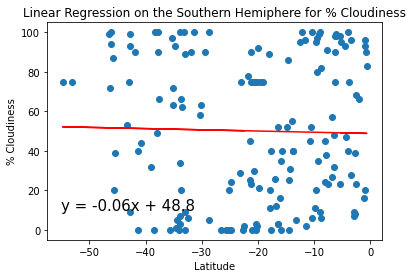

In [75]:
# Perform linear regression on the Southern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-55,10), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('Linear Regression on the Southern Hemiphere for % Cloudiness')
          
plt.show()

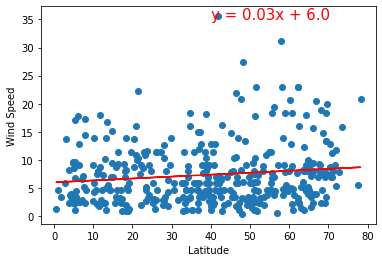

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

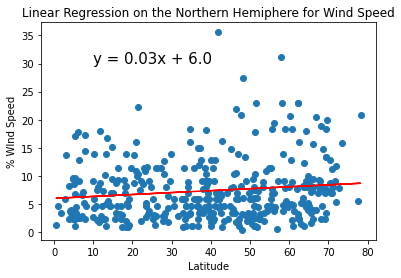

In [80]:
# Perform linear regression on the Northern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,30), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('% WInd Speed')
plt.title('Linear Regression on the Northern Hemiphere for Wind Speed')
          
plt.show()

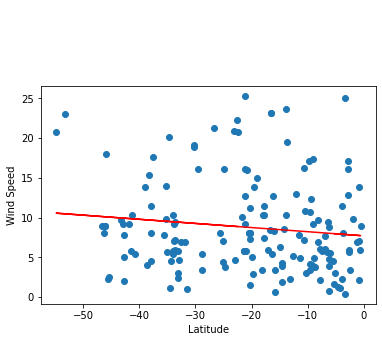

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

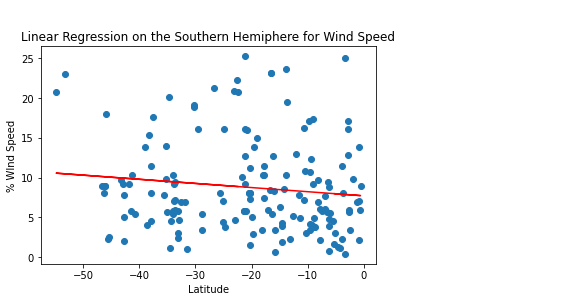

In [82]:
# Perform linear regression on the Southern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,30), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('% WInd Speed')
plt.title('Linear Regression on the Southern Hemiphere for Wind Speed')
          
plt.show()